In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook


In [2]:
bfs_antifraud = pd.read_csv("./src/antifraud_bfs.log", names=['time', 'description', 'row'], parse_dates=['time'])
bi_antifraud = pd.read_csv("./src/bi_antifraud.log", names=['time', 'description', 'row'], parse_dates=['time'])

,row,delta,cumsum
count,2.990000e+02,299.000000,299.000000
mean,1.510000e+06,125.003344,18635.695652
std,8.645808e+05,4.721434,10845.378927
min,2.000000e+04,118.000000,119.000000
25%,7.650000e+05,122.000000,9265.000000
50%,1.510000e+06,124.000000,18628.000000
75%,2.255000e+06,126.000000,27941.000000
max,3.000000e+06,150.000000,37376.000000


In [3]:
bfs_antifraud = bfs_antifraud.drop('description',1)
bi_antifraud = bi_antifraud.drop('description',1)

In [4]:
bfs_antifraud['prev'] = bfs_antifraud['time'].shift(1)
bi_antifraud['prev'] = bi_antifraud['time'].shift(1)

In [5]:
bfs_antifraud['delta'] = (bfs_antifraud['time'] - bfs_antifraud['prev']).astype('int64')
bfs_antifraud['delta'] = bfs_antifraud['delta'].apply(lambda x: int(x / 1000000))
bfs_antifraud = bfs_antifraud.drop(0,0)

In [6]:
bi_antifraud['delta'] = (bi_antifraud['time'] - bi_antifraud['prev']).astype('int64')
bi_antifraud['delta'] = bi_antifraud['delta'].apply(lambda x: int(x / 1000000))
bi_antifraud = bi_antifraud.drop(0,0)

In [7]:
bfs_antifraud['cumsum'] = bfs_antifraud['delta'].cumsum()

In [8]:
bi_antifraud['cumsum'] = bi_antifraud['delta'].cumsum()

In [24]:
bi_antifraud['delta'].describe()

count    299.000000
mean     125.003344
std        4.721434
min      118.000000
25%      122.000000
50%      124.000000
75%      126.000000
max      150.000000
Name: delta, dtype: float64

<IPython.core.display.Javascript object>


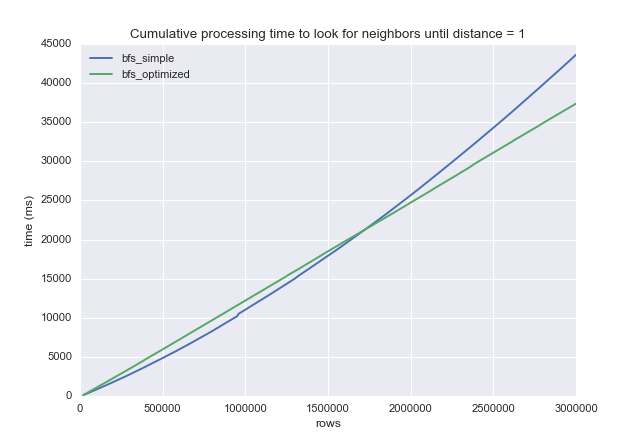

In [38]:
plt.figure()
plt.plot(bfs_antifraud['row'].ix[1:], bfs_antifraud['cumsum'], label='bfs_simple')
plt.plot(bi_antifraud['row'].ix[1:], bi_antifraud['cumsum'], label='bfs_optimized')
plt.title('Cumulative processing time to look for neighbors until distance = 1')
plt.ylabel('time (ms)')
plt.xlabel('rows')
plt.legend(loc=2)

In [11]:
antifraud2 = pd.read_csv("./src/antifraud2.log", names=['time', 'description', 'row'], parse_dates=['time'])
bi_antifraud2 = pd.read_csv("./src/bi_antifraud2.log", names=['time', 'description', 'row'], parse_dates=['time'])

,row,delta,cumsum
count,2.990000e+02,299.000000,299.000000
mean,1.510000e+06,431.397993,60902.341137
std,8.645808e+05,46.819217,37473.959200
min,2.000000e+04,330.000000,336.000000
25%,7.650000e+05,400.500000,28019.500000
50%,1.510000e+06,434.000000,59060.000000
75%,2.255000e+06,467.000000,92658.500000
max,3.000000e+06,527.000000,128988.000000


In [12]:
antifraud2 = antifraud2.drop('description',1)
bi_antifraud2 = bi_antifraud2.drop('description',1)

In [13]:
antifraud2['prev'] = antifraud2['time'].shift(1)
bi_antifraud2['prev'] = bi_antifraud2['time'].shift(1)

In [14]:
antifraud2['delta'] = (antifraud2['time'] - antifraud2['prev']).astype('int64')
antifraud2['delta'] = antifraud2['delta'].apply(lambda x: int(x / 1000000))
antifraud2 = antifraud2.drop(0,0)

In [15]:
bi_antifraud2['delta'] = (bi_antifraud2['time'] - bi_antifraud2['prev']).astype('int64')
bi_antifraud2['delta'] = bi_antifraud2['delta'].apply(lambda x: int(x / 1000000))
bi_antifraud2 = bi_antifraud2.drop(0,0)

In [16]:
antifraud2['cumsum'] = antifraud2['delta'].cumsum()

In [17]:
bi_antifraud2['cumsum'] = bi_antifraud2['delta'].cumsum()

In [25]:
bi_antifraud2['delta'].describe()

count    299.000000
mean     431.397993
std       46.819217
min      330.000000
25%      400.500000
50%      434.000000
75%      467.000000
max      527.000000
Name: delta, dtype: float64

<IPython.core.display.Javascript object>


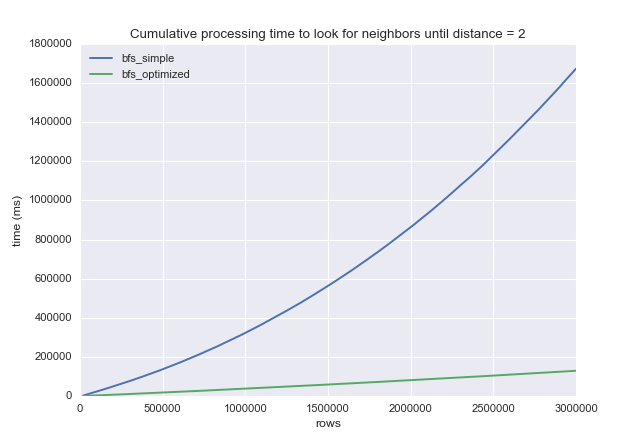

In [26]:
plt.figure()
plt.plot(antifraud2['row'].ix[1:], antifraud2['cumsum'], label='bfs_simple')
plt.plot(bi_antifraud2['row'].ix[1:], bi_antifraud2['cumsum'], label='bfs_optimized')
plt.title('Cumulative processing time to look for neighbors until distance = 2')
plt.ylabel('time (ms)')
plt.xlabel('rows')
plt.legend(loc=2)

In [27]:
antifraud3 = pd.read_csv("./src/antifraud3.log", names=['time', 'description', 'row'], parse_dates=['time'])
bi_antifraud3 = pd.read_csv("./src/bi_antifraud3.log", names=['time', 'description', 'row'], parse_dates=['time'])

In [28]:
antifraud3 = antifraud3.drop('description',1)
bi_antifraud3 = bi_antifraud3.drop('description',1)

In [29]:
antifraud3['prev'] = antifraud3['time'].shift(1)
bi_antifraud3['prev'] = bi_antifraud3['time'].shift(1)

In [30]:
antifraud3['delta'] = (antifraud3['time'] - antifraud3['prev']).astype('int64')
antifraud3['delta'] = antifraud3['delta'].apply(lambda x: int(x / 1000000))
antifraud3 = antifraud3.drop(0,0)

In [32]:
bi_antifraud3['delta'] = (bi_antifraud3['time'] - bi_antifraud3['prev']).astype('int64')
bi_antifraud3['delta'] = bi_antifraud3['delta'].apply(lambda x: int(x / 1000000))
bi_antifraud3 = bi_antifraud3.drop(0,0)

In [33]:
antifraud3['cumsum'] = antifraud3['delta'].cumsum()

In [34]:
bi_antifraud3['cumsum'] = bi_antifraud3['delta'].cumsum()

In [35]:
bi_antifraud3['delta'].describe()

count      299.000000
mean      7548.772575
std       2860.726858
min       3110.000000
25%       5389.000000
50%       7106.000000
75%       9707.000000
max      16340.000000
Name: delta, dtype: float64

<IPython.core.display.Javascript object>


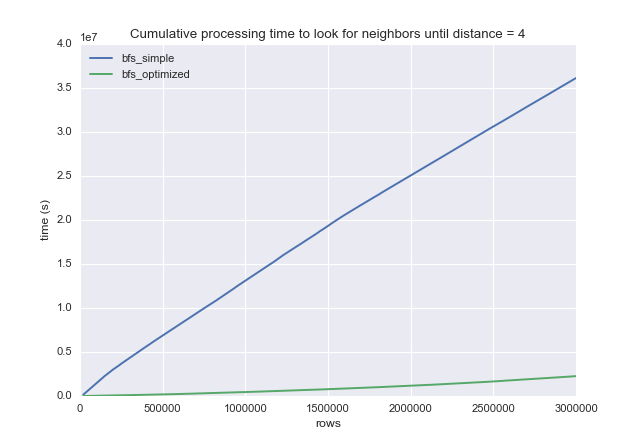

In [37]:
plt.figure()
plt.plot(antifraud2['row'].ix[1:], antifraud3['cumsum'], label='bfs_simple')
plt.plot(bi_antifraud3['row'].ix[1:], bi_antifraud3['cumsum'], label='bfs_optimized')
plt.title('Cumulative processing time to look for neighbors until distance = 4')
plt.ylabel('time (s)')
plt.xlabel('rows')
plt.legend(loc=2)